In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
plt.style.use('ggplot')

In [2]:
df = pd.read_excel("credito.xlsx")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 10 columns):
IDENTIDADE      25000 non-null int64
ALVO            25000 non-null int64
STATUS          25000 non-null object
UF              25000 non-null object
SEXO            25000 non-null object
ESCOLARIDADE    25000 non-null object
ESTCIV          25000 non-null object
RENDA           25000 non-null int64
NATUREZA        25000 non-null object
NATURAL         25000 non-null object
dtypes: int64(3), object(7)
memory usage: 1.9+ MB


In [4]:
df.head()

,IDENTIDADE,ALVO,STATUS,UF,SEXO,ESCOLARIDADE,ESTCIV,RENDA,NATUREZA,NATURAL
0,1001,0,inad,SP,F,secundario,solt,3886,outros,C
1,1002,1,admpl,MG,M,secundario,casado,3870,vivederenda,C
2,1003,1,admpl,SP,F,superior,solt,2010,empregado,F
3,1004,1,admpl,SP,F,posgrad,solt,2441,func_publico,B
4,1005,0,inad,SP,F,primario,divorciado,1139,func_publico,A


## Análise Exploratória

### Dados ausentes

Vamos olhar como a ausência de dados está distribuida na base

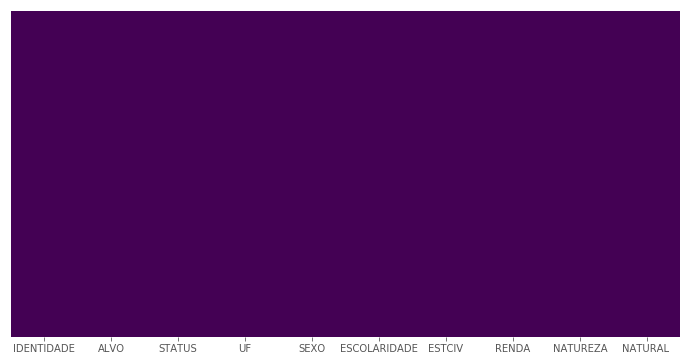

In [5]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")

### Variável alvo


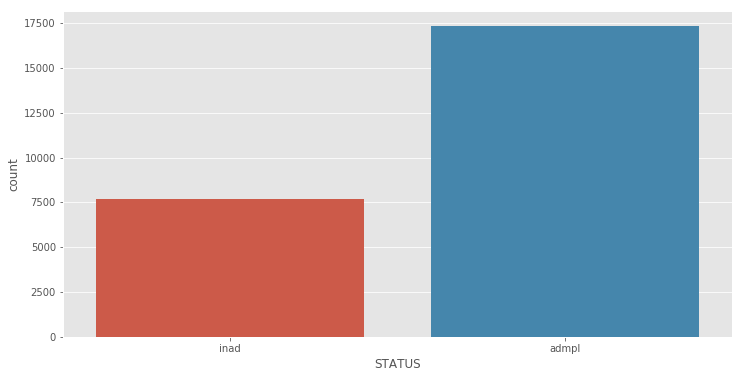

In [6]:
plt.figure(figsize=(12, 6))
sns.countplot(x="STATUS", data=df)

### Variáveis 
Como não há dados ausentes, vamos verificar a distriuição de cada variável

---
<br>
#### UF
Este gráfico mostra a distribuição de frequências de cada estado na base de dados

In [7]:
def plotOneVarGraph(var, target, dataframe):
    plt.figure(figsize=(12, 6))
    sns.countplot(x=var, data=dataframe)

    plt.figure(figsize=(12, 6))
    sns.countplot(x=var, data=dataframe, hue=target)

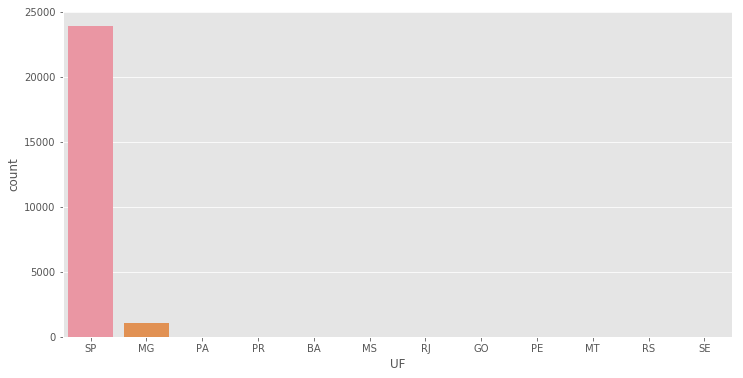

In [8]:
plt.figure(figsize=(12, 6))
sns.countplot(x="UF", data=df)

Olhando para o estado de São Paulo, temos: 

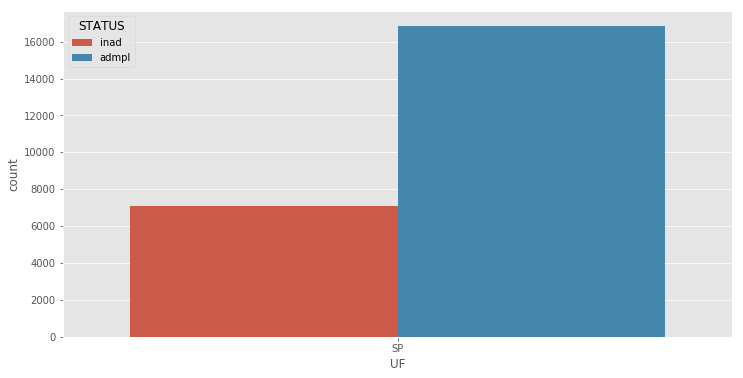

In [9]:
df_SP = df[df["UF"] == "SP"]
plt.figure(figsize=(12, 6))
sns.countplot(x="UF", data=df_SP, hue="STATUS")

Olhando para o estadeo de Minas Gerais, temos: 

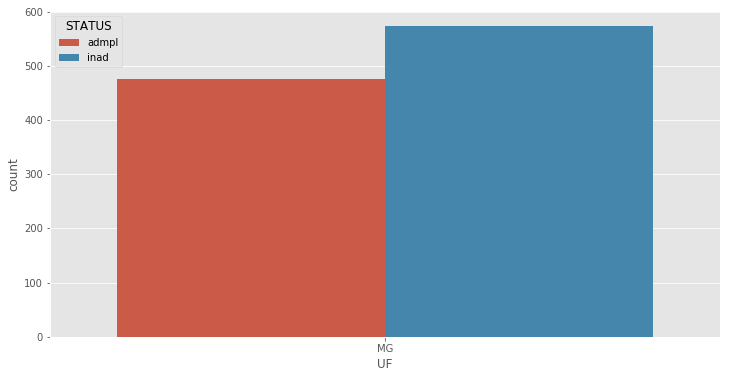

In [10]:
df_MG = df[df["UF"] == "MG"]
plt.figure(figsize=(12, 6))
sns.countplot(x="UF", data=df_MG, hue="STATUS")

### Sexo
O gráfico a seguir mostra a distribuição dos sexos ao longo da base. A distribuição parece estar razoavelmente equilibrada

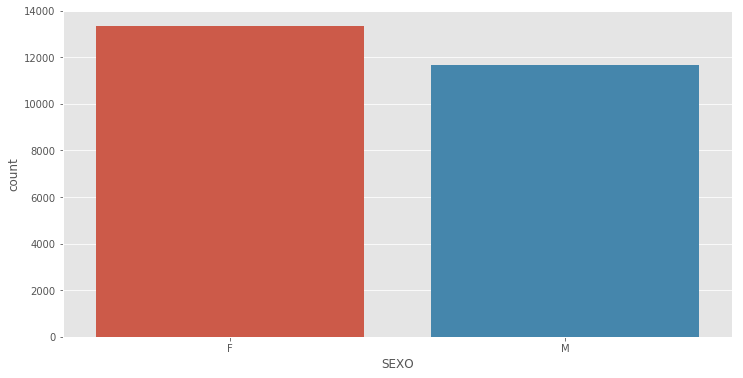

In [11]:
plt.figure(figsize=(12, 6))
sns.countplot(x="SEXO", data=df)

Vamos olhar para a distribuição de sexo por status. Existe menos mulheres inadimplentes do que homens adimplentes

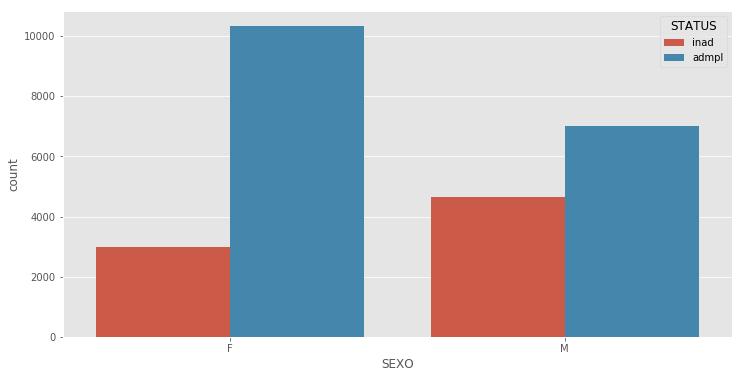

In [12]:
plt.figure(figsize=(12, 6))
sns.countplot(x="SEXO", data=df, hue="STATUS")

### Escolaridade
Os gráficos a seguir mostram a disribuição de escolaridade ao longo da base

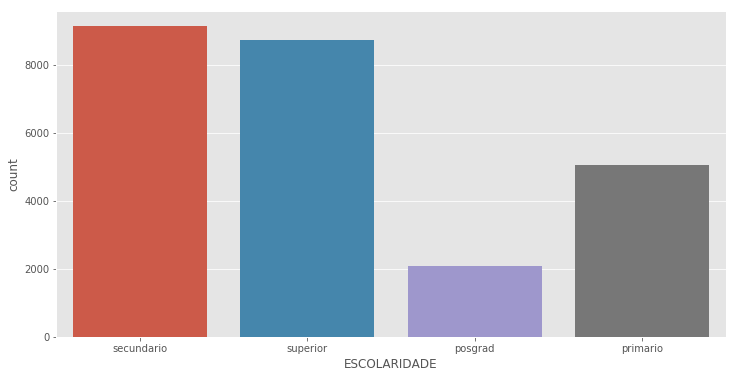

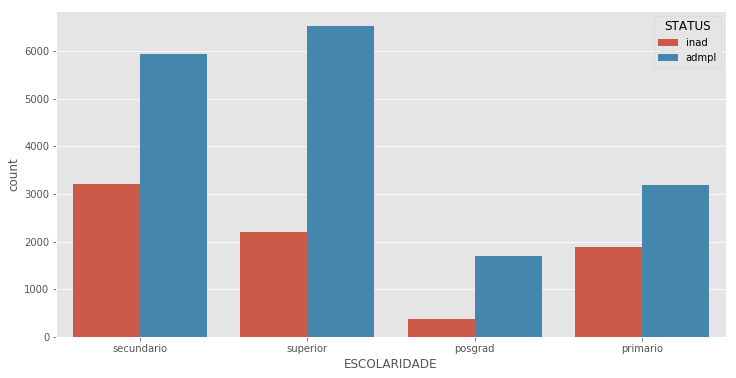

In [13]:
plt.figure(figsize=(12, 6))
sns.countplot(x="ESCOLARIDADE", data=df)

plt.figure(figsize=(12, 6))
sns.countplot(x="ESCOLARIDADE", data=df, hue="STATUS")

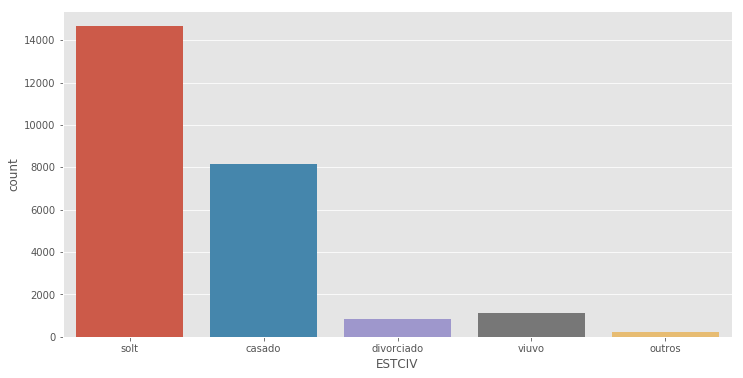

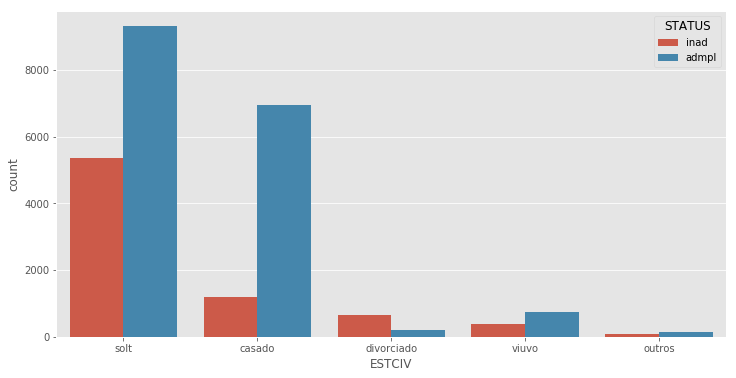

In [14]:
plotOneVarGraph("ESTCIV", "STATUS", df)

### Natureza

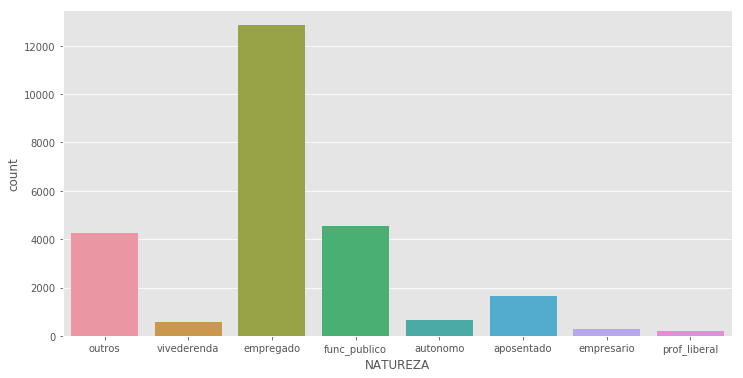

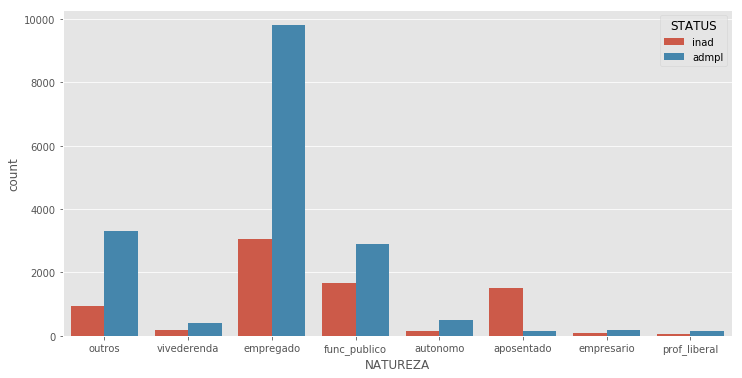

In [15]:
plotOneVarGraph("NATUREZA", "STATUS", df)

### Natural

O significado da variável Natural é desconhecido

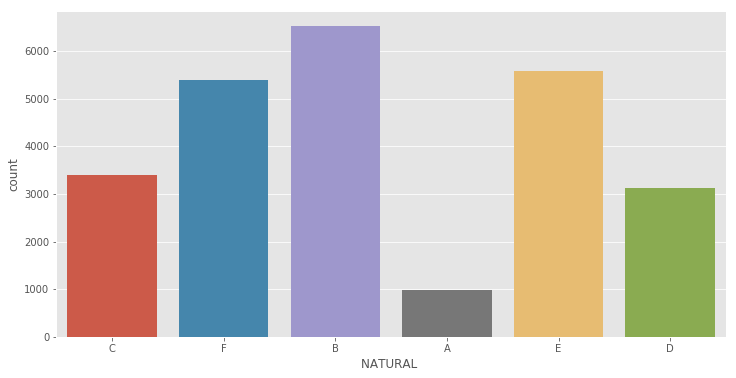

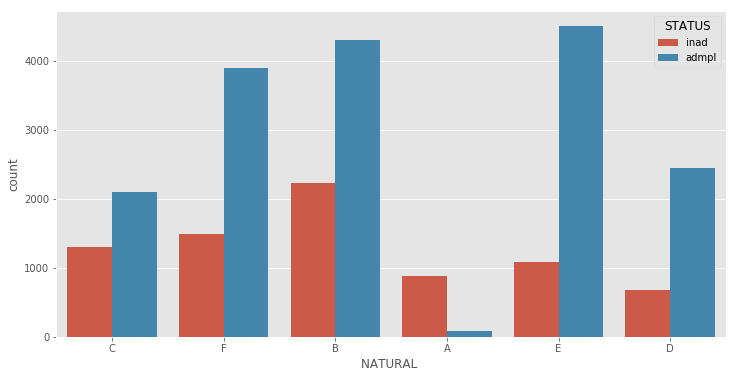

In [16]:
plotOneVarGraph("NATURAL ", "STATUS", df)

### Renda

Antes de analisar a renda, vamos categorizar os registros

In [17]:
def discretizaRenda(x):
    if x >= 0 and x <= 1576.00:
        return "E"
    if x > 1576.00 and x <= 3152.00:
        return "D"
    if x > 3152.00 and x <= 7880.00:
        return "C"
    if x > 7880.00 and x <= 15760.00:
        return "B"
    if x > 15760.00:
        return "A"

classe_social = df["RENDA"].apply(discretizaRenda)
df["CLASSE_SOCIAL"] = classe_social

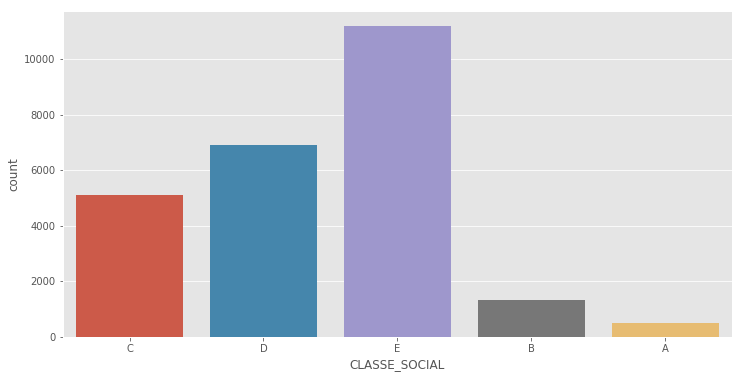

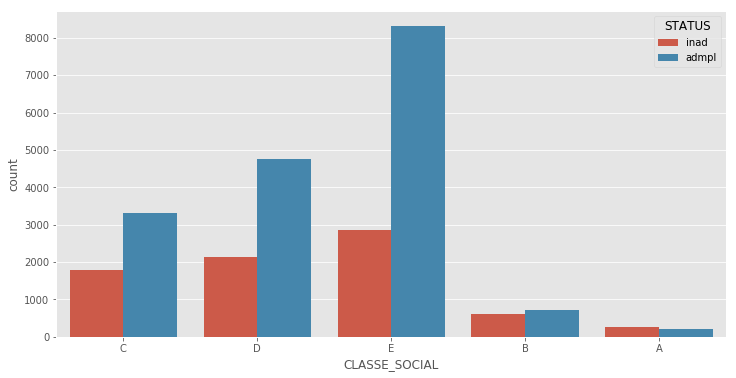

In [18]:
plotOneVarGraph("CLASSE_SOCIAL", "STATUS", df)

Como é possível observar, a classe A é a que possui maior proporção de inadimplência

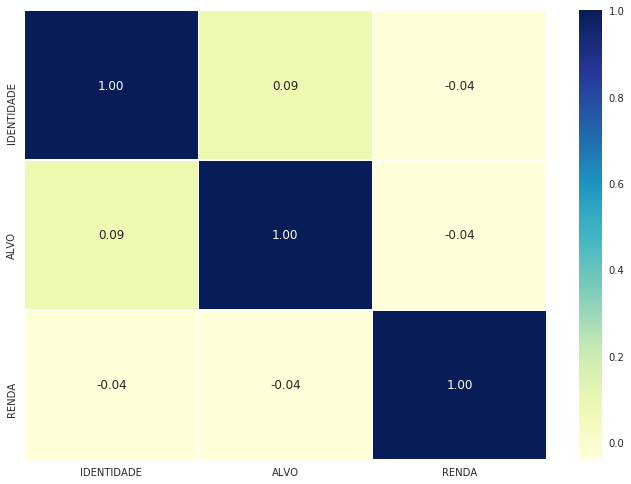

In [19]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(df.corr(method='pearson', min_periods=1), 
            fmt=".2f", annot=True,cmap="YlGnBu",
            linewidths=.5)

## Pré-processamento

* **0: Inadimplente**
* **1: Adimplente**

In [20]:
df.drop(labels=["IDENTIDADE", "STATUS", "RENDA", "NATURAL "], inplace=True, axis=1)


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 7 columns):
ALVO             25000 non-null int64
UF               25000 non-null object
SEXO             25000 non-null object
ESCOLARIDADE     25000 non-null object
ESTCIV           25000 non-null object
NATUREZA         25000 non-null object
CLASSE_SOCIAL    25000 non-null object
dtypes: int64(1), object(6)
memory usage: 1.3+ MB


In [22]:
uf_dummy = pd.get_dummies(df["UF"], 'uf')
sexo_dummy = pd.get_dummies(df["SEXO"], 'sexo')
escolaridade_dummy = pd.get_dummies(df["ESCOLARIDADE"], 'escol')
estadoCivil_dummy = pd.get_dummies(df["ESTCIV"], 'estCivil')
natureza_dummy = pd.get_dummies(df["NATUREZA"], 'nat')
classeSocial_dummy = pd.get_dummies(df["CLASSE_SOCIAL"], 'classeSocial')
alvo_dummy = pd.get_dummies(df["ALVO"], 'target')

In [23]:
final_df = pd.concat([uf_dummy,
                      sexo_dummy,
                      escolaridade_dummy,
                      estadoCivil_dummy,
                      natureza_dummy,
                      classeSocial_dummy,
                     alvo_dummy], axis=1)

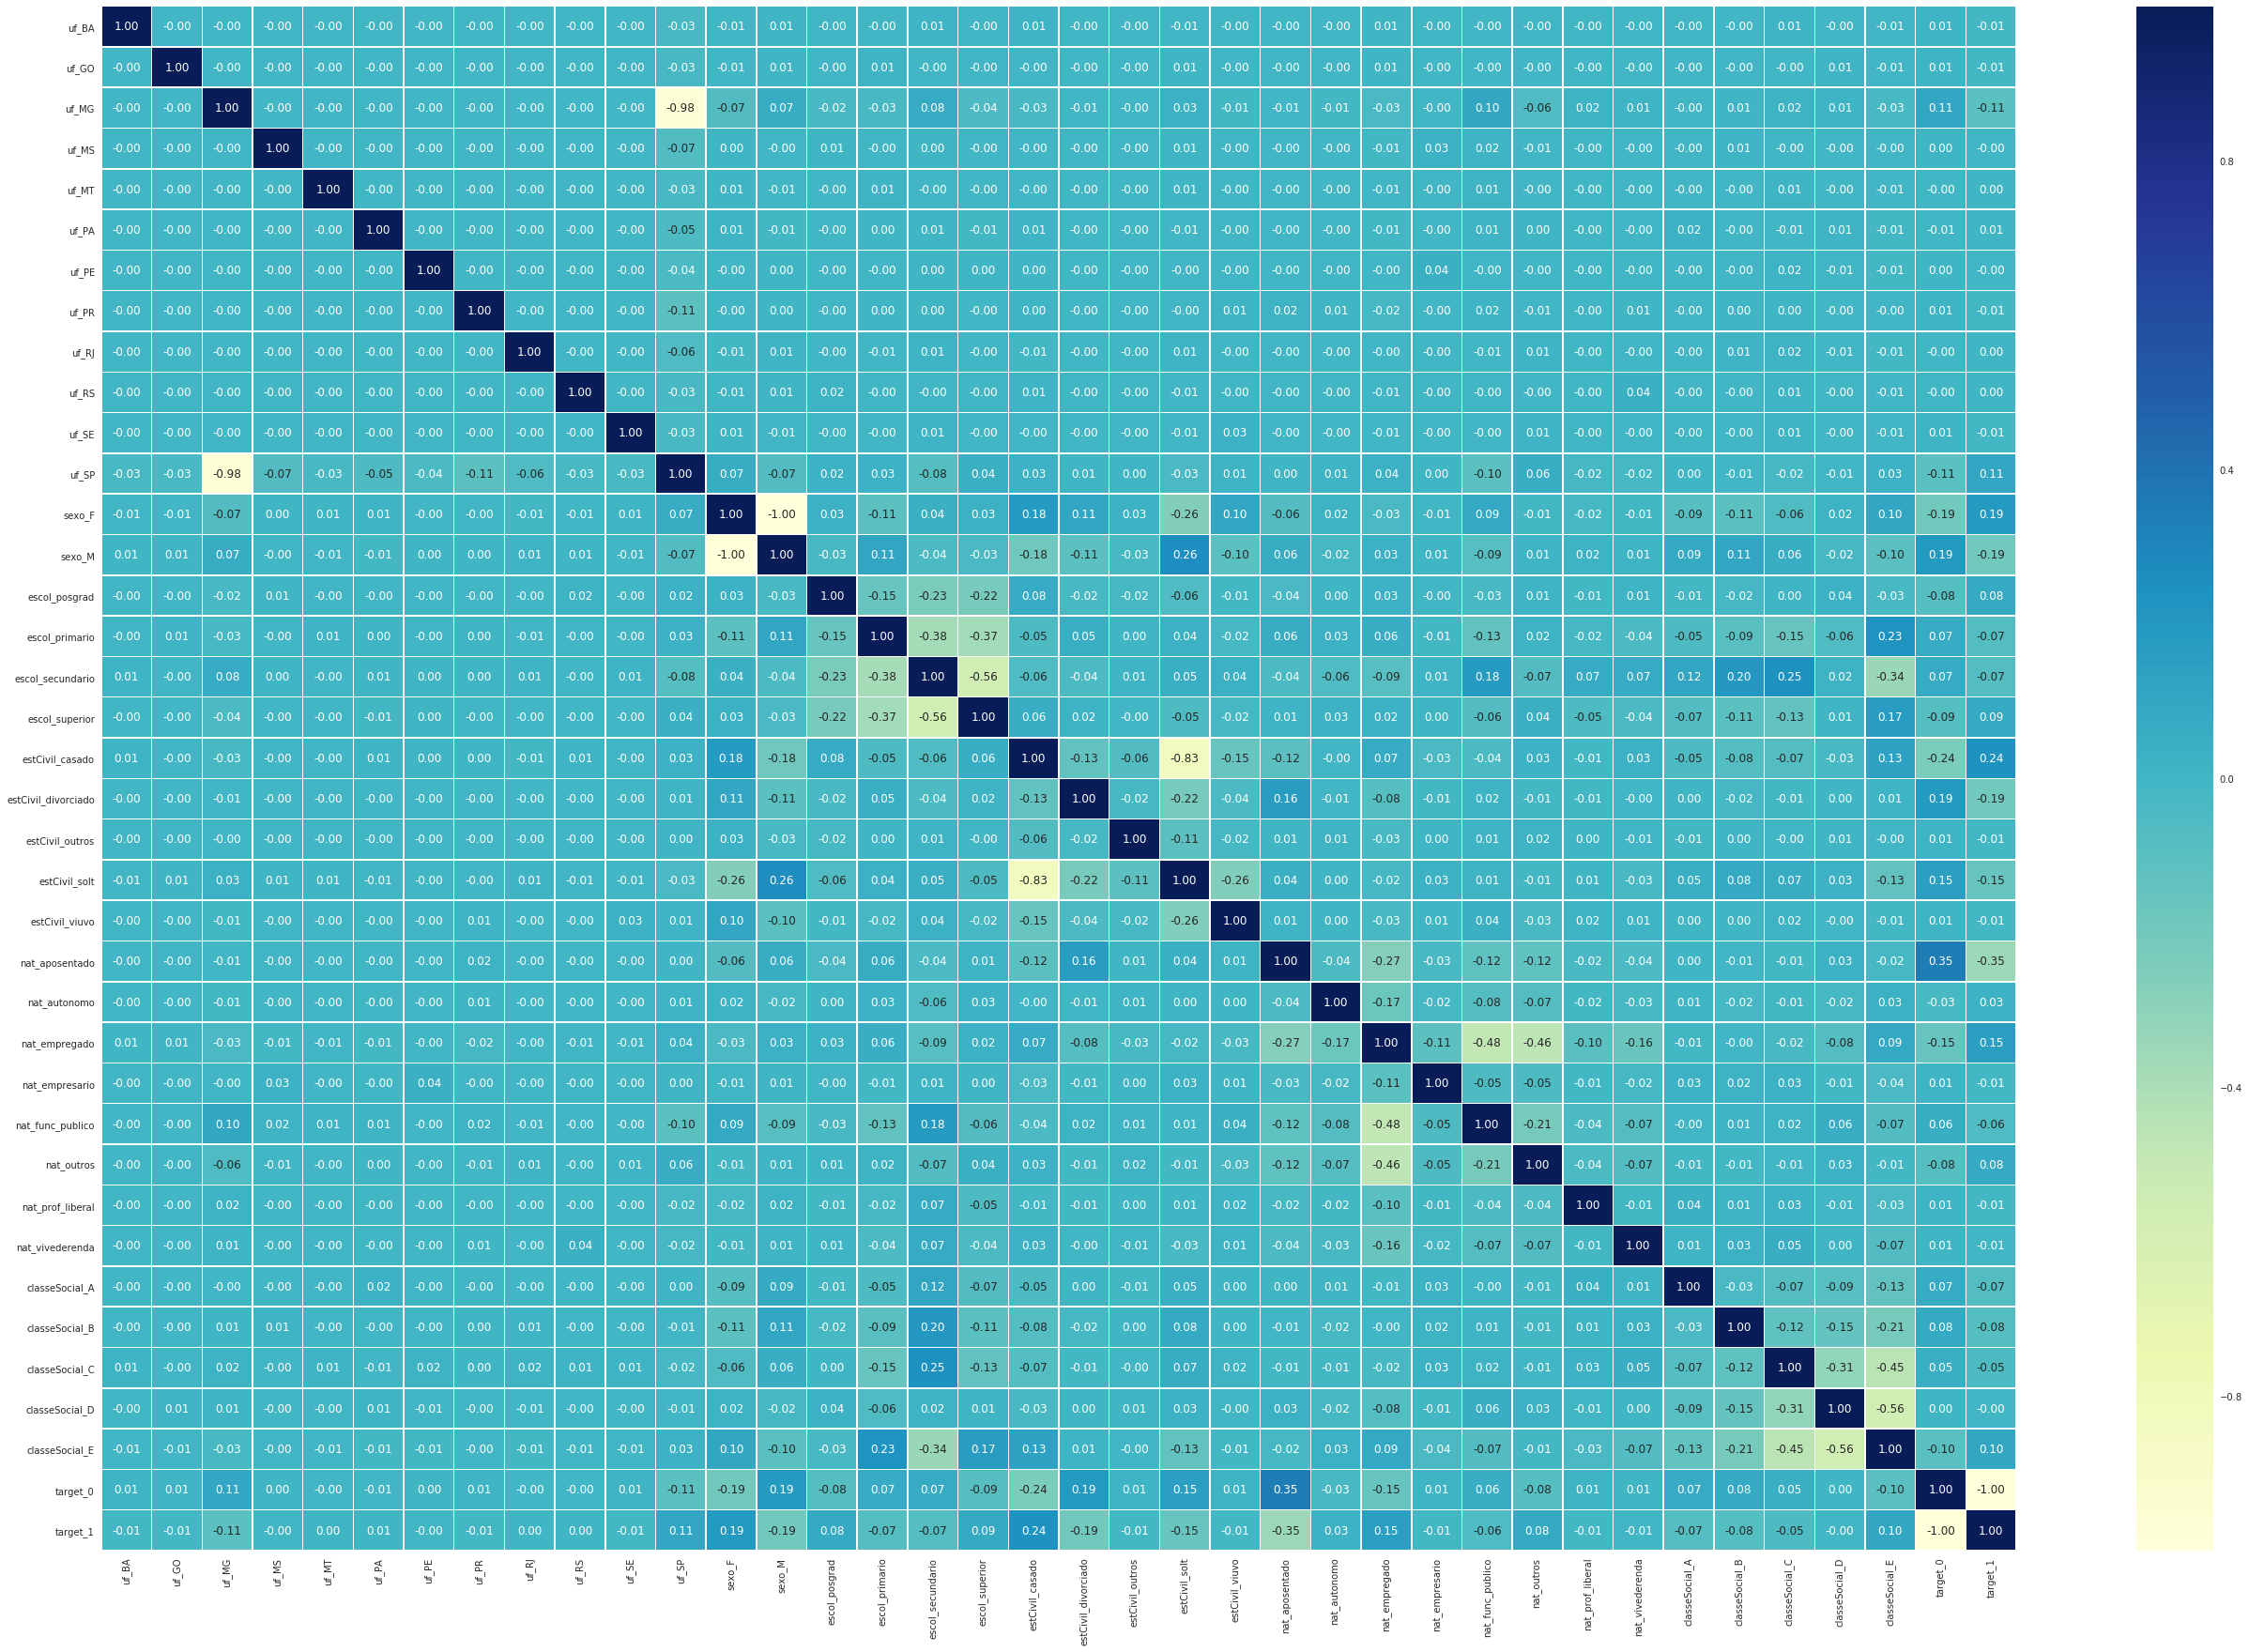

In [24]:
sns.set(rc={'figure.figsize':(45.7,30.27)})
sns.heatmap(final_df.corr(method='pearson', min_periods=1), 
            fmt=".2f", annot=True,cmap="YlGnBu",
            linewidths=.5)

In [25]:
final_df.columns

Index(['uf_BA', 'uf_GO', 'uf_MG', 'uf_MS', 'uf_MT', 'uf_PA', 'uf_PE', 'uf_PR',
       'uf_RJ', 'uf_RS', 'uf_SE', 'uf_SP', 'sexo_F', 'sexo_M', 'escol_posgrad',
       'escol_primario', 'escol_secundario', 'escol_superior',
       'estCivil_casado', 'estCivil_divorciado', 'estCivil_outros',
       'estCivil_solt', 'estCivil_viuvo', 'nat_aposentado', 'nat_autonomo',
       'nat_empregado', 'nat_empresario', 'nat_func_publico', 'nat_outros',
       'nat_prof_liberal', 'nat_vivederenda', 'classeSocial_A',
       'classeSocial_B', 'classeSocial_C', 'classeSocial_D', 'classeSocial_E',
       'target_0', 'target_1'],
      dtype='object')

## Treinamento

In [26]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc, confusion_matrix

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

/home/victor/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [27]:
X_DEFAULT = pd.DataFrame()
X_DEFAULT = final_df[final_df["target_0"] == 0]
X_DEFAULT.drop(inplace=True, axis=1, labels="target_1")

X_NOT_DEFAULT = pd.DataFrame()
X_NOT_DEFAULT = final_df[final_df["target_0"] == 1]
X_NOT_DEFAULT.drop(inplace=True, axis=1, labels="target_1")

minTam = min(len(X_DEFAULT), len(X_NOT_DEFAULT))
targetName = "target_0"

/home/victor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/victor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [60]:
len(X_DEFAULT)
len(X_NOT_DEFAULT)

17336

7664

In [29]:
def val_score(clf, X_TARGET, X_NOT_TARGET, tam, nr = 1):
    
    times_run = nr
    
    # List of models with number of times to run the algorithm
    fit_gini = [None] * times_run
    acc = [None] * times_run
    confusion = [None] * times_run

    for col in range(len(fit_gini)):
        
        # Samples the dataframe with the target occurrencies 
        X_TARGET = X_TARGET.sample(n=tam, replace=False)
        
        # Split into train and test
        X_TARGET_TRAIN = X_TARGET[0:int((tam*2)/3)]
        X_TARGET_TEST = X_TARGET[int((tam*2)/3):]

        X_NOT_TARGET = X_NOT_TARGET.sample(n=tam, replace=False)
        X_NOT_TARGET_TRAIN = X_NOT_TARGET[0:int((tam*2)/3)]
        X_NOT_TARGET_TEST = X_NOT_TARGET[int((tam*2)/3):]
        
        # Concatanate the both dataframe created
        X_TRAIN = pd.concat([X_TARGET_TRAIN,X_NOT_TARGET_TRAIN])
        
        # Sample it again
        X_TRAIN = X_TRAIN.sample(n=len(X_TRAIN), replace=False)
        X_DATA_TRAIN = X_TRAIN.drop(targetName, axis=1)
        Y_DATA_TRAIN = X_TRAIN[targetName]

        X_TEST = pd.concat([X_TARGET_TEST,X_NOT_TARGET_TEST])
        X_TEST = X_TEST.sample(n=len(X_TEST), replace=False)
        
        X_DATA_TEST = X_TEST.drop(targetName, axis=1)
        Y_DATA_TEST = X_TEST[targetName]

        fit_gini[col] = clf.fit(X_DATA_TRAIN, Y_DATA_TRAIN)

        Y_PREDICT = fit_gini[col].predict(X_DATA_TEST)
        acc[col] = accuracy_score(Y_DATA_TEST, Y_PREDICT)
        #fpr, tpr, th = roc_curve(Y_DATA_TEST, Y_PREDICT)

        #fpr
        #tpr
        #th

        #roc_auc = auc(fpr, tpr)

        # method I: plt
        #import matplotlib.pyplot as plt
        #plt.title('Curva Roc')
        #plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
        #plt.legend(loc = 'lower right')
        #plt.plot([0, 1], [0, 1],'r--')
        #plt.xlim([0, 1])
        #plt.ylim([0, 1])
        #plt.ylabel('True Positive Rate')
        #plt.xlabel('False Positive Rate')
        #plt.show()

        confusion[col] = confusion_matrix(Y_DATA_TEST, Y_PREDICT)
    
    return acc, confusion, fit_gini

## Modelos
A seguir alguns algoritmos serão executados a fim de esoclher qual o melhor modelo a ser usado para classificar os dados

---

## Árvore de Decisão

In [30]:
alt = 7

clf_gini = DecisionTreeClassifier(criterion = "entropy", 
                                  random_state = 100,
                                  max_depth=alt, 
                                  min_samples_leaf=10,
                                  min_samples_split=2,
                                 )
maxTam = int(1.0*minTam)
acc, confusion, treeModels = val_score(clf_gini,
                                       X_DEFAULT[0:maxTam], 
                                       X_NOT_DEFAULT[0:maxTam],
                                       maxTam,
                                       10
                                      )


acc

[0.6620352250489236,
 0.6679060665362035,
 0.673972602739726,
 0.6677103718199608,
 0.6720156555772994,
 0.67866927592955,
 0.6637964774951076,
 0.6698630136986301,
 0.6706457925636008,
 0.6712328767123288]

## Regressao logística


In [58]:
from sklearn import linear_model
regr = linear_model.LogisticRegression(C=1e5)
maxTam = int(1.0*minTam)
acc, confusion, logisticRegrModels = val_score(regr, X_DEFAULT, X_NOT_DEFAULT, maxTam, 10)
acc

[0.7066536203522505,
 0.7011741682974559,
 0.7109589041095891,
 0.7019569471624266,
 0.7027397260273973,
 0.7142857142857143,
 0.7086105675146771,
 0.713894324853229,
 0.7031311154598826,
 0.7176125244618395]

In [59]:
# import pprint
# pp = pprint.PrettyPrinter(indent=2)
# pp.pprint(confusion[0])

pd.DataFrame(data=confusion[0],
             columns=["Default", "Non-default"],
             index=["Default", "Non-default"]
            )

,Default,Non-default
Default,1878,677
Non-default,822,1733


## SVM

In [32]:
from sklearn import svm

clf_svm = svm.SVC(kernel='linear')
#scores = cross_val_score(clf_svm, X, Y, cv=10)

acc, confusion, svmModels = val_score(clf_svm, X_DEFAULT, X_NOT_DEFAULT, maxTam, 10)

In [33]:
acc

[0.6986301369863014,
 0.7150684931506849,
 0.7,
 0.7160469667318983,
 0.7078277886497064,
 0.7035225048923679,
 0.7056751467710372,
 0.7054794520547946,
 0.7001956947162427,
 0.7095890410958904]

## Bayes

In [34]:
from sklearn.naive_bayes import BernoulliNB, GaussianNB

clf_guassian = GaussianNB()

acc, confusion, bayesModels = val_score(clf_guassian,
                                        X_DEFAULT,
                                        X_NOT_DEFAULT,
                                        int(0.9*minTam), 
                                        10)
acc

[0.6200521966072206,
 0.6424532405393649,
 0.6187472814267073,
 0.6391909525880818,
 0.6676816006959547,
 0.6511526750761201,
 0.6198347107438017,
 0.6446280991735537,
 0.6435406698564593,
 0.6450630709003915]

## Gradient Boosting

In [35]:
from sklearn.ensemble import GradientBoostingClassifier

clf_gradient = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, 
                                 max_depth=1, random_state=100)

acc, confusion, gradientBoostingModels = val_score(clf_gradient,
                                                    X_DEFAULT,
                                                    X_NOT_DEFAULT,
                                                    int(0.9*minTam), 
                                                    10)
acc

[0.7061765985210962,
 0.715311004784689,
 0.7200956937799043,
 0.7053066550674206,
 0.7092214006089604,
 0.7085689430187038,
 0.702914310569813,
 0.7109612875163115,
 0.7122662026968247,
 0.7007394519356241]

In [36]:
from sklearn.ensemble import RandomForestClassifier

clf_rand_forest = RandomForestClassifier(max_depth=2, random_state=100)
acc, confusion, randomForestModels = val_score(clf_rand_forest,
                                                X_DEFAULT,
                                                X_NOT_DEFAULT,
                                                int(0.9*minTam), 
                                                10)
acc

[0.7037842540234884,
 0.6765985210961287,
 0.6887777294475859,
 0.6981296215745977,
 0.6857329273597216,
 0.6889952153110048,
 0.6976946498477599,
 0.6942148760330579,
 0.7079164854284472,
 0.7044367116137451]

In [37]:
from sklearn.neural_network import MLPClassifier

clf_mlp = MLPClassifier()
acc, confusion, mlptModels = val_score(clf_mlp,
                                        X_DEFAULT,
                                        X_NOT_DEFAULT,
                                        int(0.9*minTam), 
                                        10)
acc

[0.713571117877338,
 0.7111787733797303,
 0.7061765985210962,
 0.7124836885602436,
 0.7177033492822966,
 0.7081339712918661,
 0.7059591126576773,
 0.7131361461505002,
 0.710091344062636,
 0.7057416267942583]

---

Para este _dataset_ o **MultiLayer Perceptron** e o **Gradient Boosting** se mostraram bons classificadores

---